In [1]:
import json
with open('data/index/index.json','r') as repoDat:

    repos = json.loads(repoDat.read())


In [2]:
dir(repos)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [3]:
repos.keys()

dict_keys(['repo', 'packages'])

In [4]:
repoKeys = repos['packages'].keys()

for key in repoKeys:
    print(key)
    current = repos['packages'][key]
    print(current.keys())
    print(len(current['versions']))
    print(current['metadata']['lastUpdated'])
    print(current)
    break


An.stop
dict_keys(['metadata', 'versions'])
2
1344556800000
{'metadata': {'added': 1309737600000, 'categories': ['Time'], 'issueTracker': 'https://github.com/jdmonin/anstop/issues', 'lastUpdated': 1344556800000, 'license': 'GPL-2.0-only', 'sourceCode': 'https://github.com/jdmonin/anstop', 'name': {'en-US': 'Anstop'}, 'summary': {'cs': 'Jednoduché stopky', 'de': 'Eine einfache Stoppuhr', 'en-US': 'A simple stopwatch', 'eo': 'Simpla temp-mezurilo', 'es': 'Un cronómetro simple', 'fr': 'Un chronomètre simple', 'gd': 'Stad-uaireadair sìmplidh', 'he': 'שעון עצר פשוט', 'id': 'Stopwatch', 'it': 'Un semplice cronometro', 'ja': '質素なストップウォッチ', 'nb': 'Enkel stoppeklokke', 'pl': 'Prosty stoper', 'pt': 'Um simples cronômetro', 'pt-BR': 'Um simples cronômetro', 'pt-PT': 'Um simples cronômetro', 'ro': 'Un cronometru simplu', 'ru': 'Простой секундомер', 'sq': 'Një kronometër i thjeshtë', 'sw': 'Saa ya michezo iliyo sahili', 'tr': 'Basit bir süreölçer (kronometre)', 'uk': 'Простий секундомір', 'zh-CN': 

In [5]:

# get current unix timestamp
from datetime import datetime
import calendar
d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())

print(unixtime)


1675099503


Text(0.5, 0, 'Years since added')

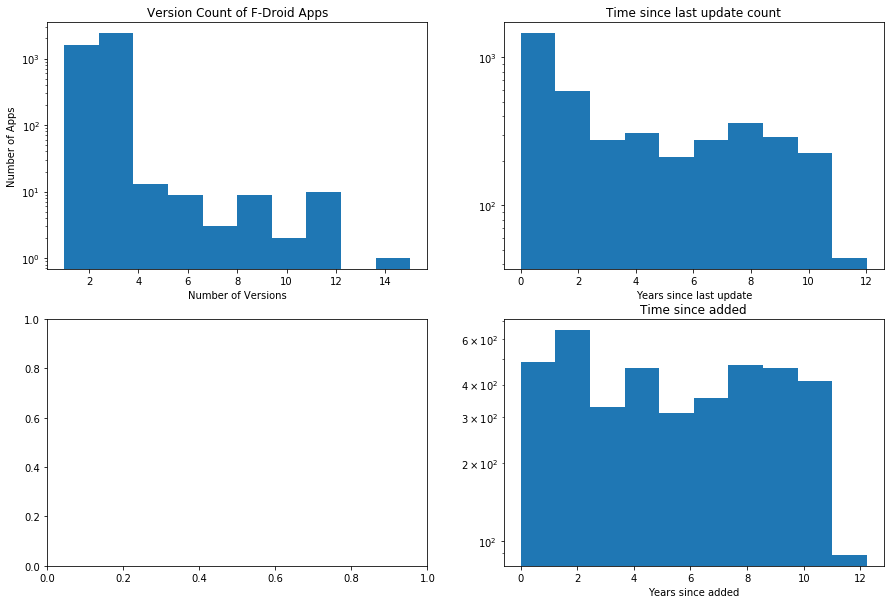

In [6]:
# histogram showing and plot
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

def secondsToYears(s):
    return ((s/60./60)/24.)/365.
def yearsSince(ms):
    return secondsToYears(unixtime - (ms/1000.))
versionList = []
lastUpdateList = []
addedSinceList = []
selected = []
for key in repoKeys:
    current = repos['packages'][key]
    versionCount = len(current['versions'])

    lastUpdated = current['metadata']['lastUpdated']
    added = current['metadata']['added']
    timeSinceUpdate = yearsSince(lastUpdated)
    addedSince = yearsSince(added)
    addedSinceList.append(addedSince)
    timeSinceAdded = yearsSince(added)
    lastUpdateList.append(timeSinceUpdate)
    versionList.append(versionCount)
    if timeSinceUpdate < 2.0 and timeSinceAdded > 8.0:
        selected.append((key,current))

counts,bins = np.histogram(versionList)
fig,axs = plt.subplots(2,2)
fig.suptitle("")
axs[0][0].hist(bins[:-1], bins, weights=counts, log=True)
axs[0][0].set_title("Version Count of F-Droid Apps")
axs[0][0].set_xlabel("Number of Versions")
axs[0][0].set_ylabel("Number of Apps")

counts,bins = np.histogram(lastUpdateList)
axs[0][1].hist(bins[:-1],bins,weights=counts,log=True)
axs[0][1].set_title("Time since last update count")
axs[0][1].set_xlabel("Years since last update")

counts,bins = np.histogram(addedSinceList)
axs[1][1].hist(bins[:-1], bins,weights=counts,log=True)
axs[1][1].set_title("Time since added")
axs[1][1].set_xlabel("Years since added")



In [7]:
len(selected)
selectedKeys = [k[0] for k in selected]
selectedKeys[0]

'at.bitfire.davdroid'

In [8]:
#with open('fdroid_updatedLast2Yrs_addedOver8YrsAgo', 'w') as f:
#  f.write('\n'.join([s[0] for s in selected]))

In [ ]:
# Download them
import main
import importlib
importlib.reload(main)
outDir ="/Users/shawnmeier/Documents/data/fdroid_updatedLast2Yrs_addedOver8YrsAgo"
main.downloadPackages(selectedKeys, 15, outDir)

No s3 profile found, using local storage.
Retrieving at.bitfire.davdroid
Retrieving at.tomtasche.reader
Retrieving be.digitalia.fosdem
Retrieving ca.farrelltonsolar.classic
Retrieving ch.blinkenlights.android.vanilla
Retrieving ch.hgdev.toposuite
Retrieving com.MarcosDiez.shareviahttp
Retrieving com.aaronjwood.portauthority
Retrieving com.adonai.manman
Retrieving com.alexkang.loopboard
Retrieving com.android.keepass
